# **Team - 29 Data Wizards**
# The Weather of 187 Countries in 2020 Dataset
#### In this dataset, data is collected from different weather stations across all 187 countries. It contains around 23 different features such as Snow, Snow Depth, Average Temp, Max Temp, Min Temp, Date, Country, Station, etc. and out of which many features contains more than 90% of the values as Null.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
import calendar
import warnings 
warnings.filterwarnings('ignore')

## **1. Loading Weather Data**

In this code snippet, weather data is loaded from a CSV file named "the weather of 187 countries in 2020.csv." This dataset contains information about weather conditions across 187 countries for the year 2020. It is in this GitHub Repo itself. It can also be obtained from [Kaggle](https://www.kaggle.com/datasets/amirhoseinsedaghati/the-weather-of-187-countries-in-2020?select=the+weather+of+187+countries+in+2020.csv).

In [2]:
weather_data = pd.read_csv('the weather of 187 countries in 2020.csv')

## **2. Exploratory Data Analysis (EDA)**

#### 1. Missing Data Percentage
This code calculates the percentage of missing values in each column of the `weather_data` DataFrame. It computes the sum of missing values for each column using `isnull().sum()`, and then divides it by the total number of rows (`weather_data.shape[0]`) to obtain the missing data percentage.

Understanding the extent of missing data is crucial for data preprocessing and quality assessment in data analysis tasks.

In [3]:
(weather_data.isnull().sum())/weather_data.shape[0]

STATION            0.000000
Country/Region     0.000000
DATE               0.000000
Year               0.000000
Month              0.000000
Day                0.000000
PRCP               0.295747
SNWD               0.795578
TAVG               0.225397
TMAX               0.364050
TMIN               0.337800
SNOW               0.900826
LATITUDE           0.902432
LONGITUDE          0.902432
ELEVATION          0.902432
PRCP_ATTRIBUTES    0.994271
TAVG_ATTRIBUTES    0.996328
TMAX_ATTRIBUTES    0.994624
TMIN_ATTRIBUTES    0.994398
DAPR               0.998796
MDPR               0.999923
WESD               0.999998
SNWD_ATTRIBUTES    0.999662
dtype: float64

#### 2. Unique Countries

This code retrieves the unique countries or regions from the `weather_data` DataFrame's 'Country/Region' column. It provides a distinct list of countries or regions present in the dataset.

In [4]:
country = weather_data['Country/Region'].unique()

In [5]:
list(country)

['Comoros',
 'Georgia',
 'Nepal',
 'Philippines',
 'Monaco',
 'US',
 'Australia',
 'Namibia',
 'Saint Lucia',
 'Lebanon',
 'Zambia',
 'Malaysia',
 'Peru',
 'Kenya',
 'Belarus',
 'Iceland',
 'Lesotho',
 'Venezuela',
 'Albania',
 'Tanzania',
 'Greece',
 'Barbados',
 'Singapore',
 'Switzerland',
 'Sri Lanka',
 'China',
 'Gabon',
 'Guinea-Bissau',
 'Congo (Brazzaville)',
 'United Arab Emirates',
 'Tajikistan',
 'Syria',
 'Lithuania',
 'Paraguay',
 'Romania',
 'Maldives',
 'Jamaica',
 'Kuwait',
 'Finland',
 'Argentina',
 'Ethiopia',
 'Japan',
 'Cameroon',
 'Bhutan',
 'Botswana',
 'Pakistan',
 'Brazil',
 'Madagascar',
 'Eritrea',
 'Liberia',
 'Mali',
 'Thailand',
 'Egypt',
 'Ireland',
 'Belgium',
 'Luxembourg',
 'Fiji',
 'Italy',
 'Greenland',
 'Antigua and Barbuda',
 'Saint Vincent and the Grenadines',
 'Andorra',
 'Guinea',
 'Nigeria',
 'Ecuador',
 'Guatemala',
 'Afghanistan',
 'Suriname',
 'Djibouti',
 'Uganda',
 'Niger',
 'Israel',
 'Russia',
 'Chile',
 'Mexico',
 'Seychelles',
 'Bosnia 

#### 3. Unique Stations

This code calculates and returns the number of unique stations in the 'STATION' column of the `weather_data` DataFrame. It provides the count of distinct weather monitoring stations in the dataset.

In [6]:
len(weather_data['STATION'].unique())

5152

#### 4. Snow Depth Counts

This code counts the occurrences of different values in the 'SNWD' column of the `weather_data` DataFrame. It provides a summary of how many times each unique value appears in the 'SNWD' column.

In [7]:
weather_data['SNWD'].value_counts()

SNWD
0.0      113541
10.0       9041
20.0       3196
30.0       2483
150.0      1509
          ...  
28.7          1
27.6          1
29.1          1
26.8          1
6.0           1
Name: count, Length: 760, dtype: int64

#### 5. Snowfall Counts

This code counts the occurrences of different values in the 'SNOW' column of the `weather_data` DataFrame. It provides a summary of how many times each unique value appears in the 'SNOW' column, indicating the frequency of snowfall.

In [8]:
weather_data['SNOW'].value_counts()

SNOW
0.0      93958
10.0      1113
20.0       753
30.0       506
5.0        480
         ...  
11.0         1
228.0        1
238.0        1
194.0        1
258.0        1
Name: count, Length: 242, dtype: int64

#### 6. The values of Longitude and Latitude are 92% null so to handle that we have tried to fill null values by filling with original latitude and longitude of each country. We have done that because we wanted to use the whole dataset for my model but then we have decided to work only on a particular country, so we have removed this code.

In [9]:
'''from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim'''

'from geopy.exc import GeocoderTimedOut\nfrom geopy.geocoders import Nominatim'

In [10]:
'''data = {'Country':country}'''

"data = {'Country':country}"

In [11]:
'''longitude = []
latitude = []
   
def findGeocode(country):
       
    try:
          
        geolocator = Nominatim(user_agent="your_app_name")

        return geolocator.geocode(country)
      
    except GeocoderTimedOut:
          
        return findGeocode(country)    
   
for i in (data['Country']):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
      
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)

    else:
        latitude.append(np.nan)
        longitude.append(np.nan)'''

'longitude = []\nlatitude = []\n   \ndef findGeocode(country):\n       \n    try:\n          \n        geolocator = Nominatim(user_agent="your_app_name")\n\n        return geolocator.geocode(country)\n      \n    except GeocoderTimedOut:\n          \n        return findGeocode(country)    \n   \nfor i in (data[\'Country\']):\n      \n    if findGeocode(i) != None:\n           \n        loc = findGeocode(i)\n      \n        latitude.append(loc.latitude)\n        longitude.append(loc.longitude)\n\n    else:\n        latitude.append(np.nan)\n        longitude.append(np.nan)'

In [12]:
'''weather_data[weather_data['Country/Region'] == 'India']['LONGITUDE'].fillna(longitude[0])'''

"weather_data[weather_data['Country/Region'] == 'India']['LONGITUDE'].fillna(longitude[0])"

In [13]:
'''x = weather_data['Country/Region'] == 'India'
weather_data.loc[x]'''

"x = weather_data['Country/Region'] == 'India'\nweather_data.loc[x]"

In [14]:
'''for country_name, lon, lat in zip(country, longitude, latitude):
    mask = weather_data['Country/Region'] == country_name
    
    if mask.any():

        weather_data.loc[mask, 'LONGITUDE'] = lon
        weather_data.loc[mask, 'LATITUDE'] = lat'''

"for country_name, lon, lat in zip(country, longitude, latitude):\n    mask = weather_data['Country/Region'] == country_name\n    \n    if mask.any():\n\n        weather_data.loc[mask, 'LONGITUDE'] = lon\n        weather_data.loc[mask, 'LATITUDE'] = lat"

#### 7. India Weather Data

This code creates a new DataFrame, `weather_india`, by selecting rows from the `weather_data` DataFrame where the 'Country/Region' is 'India'. It isolates weather data specifically related to India for further analysis.

In [15]:
weather_india = weather_data[weather_data['Country/Region']=='India'].copy()

#### 8. Weather Data Cleanup

This code modifies the `weather_india` DataFrame by removing several columns, including 'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES', 'Year', and 'SNOW'. It performs data cleanup by eliminating unnecessary or redundant information for analysis.

In [16]:
weather_india_final = weather_india.drop(['ELEVATION', 'PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES','DAPR','MDPR','WESD','SNWD_ATTRIBUTES','Year','SNOW'], axis=1)

In [17]:
weather_india_final

,STATION,Country/Region,DATE,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
589897,IN017111200,India,22-01-2020,1,22,NaN,NaN,22.5,NaN,16.1,NaN,NaN
589898,IN017111200,India,23-01-2020,1,23,NaN,NaN,24.1,NaN,18.5,NaN,NaN
589899,IN017111200,India,24-01-2020,1,24,NaN,NaN,23.2,NaN,NaN,NaN,NaN
589900,IN017111200,India,25-01-2020,1,25,NaN,NaN,21.4,NaN,NaN,NaN,NaN
589901,IN017111200,India,26-01-2020,1,26,NaN,NaN,21.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
612899,IN004102500,India,23-07-2020,7,23,6.1,NaN,28.3,NaN,24.8,NaN,NaN
612900,IN004102500,India,24-07-2020,7,24,0.0,NaN,25.7,NaN,NaN,NaN,NaN
612901,IN004102500,India,25-07-2020,7,25,72.9,NaN,28.9,NaN,NaN,NaN,NaN
612902,IN004102500,India,26-07-2020,7,26,0.0,NaN,31.3,35.8,27.6,NaN,NaN


#### 9. Missing Snow Depth Data

This code calculates and reports the number of missing values (null values) in the 'SNWD' column of the `weather_india_final` DataFrame. It provides information on the count of missing entries in the snow depth data.

In [18]:
weather_india_final['SNWD'].isnull().sum()

23007

#### 10. Missing Precipitation Data

This code calculates and reports the number of missing values (null values) in the 'PRCP' column of the `weather_india_final` DataFrame. It provides information on the count of missing entries in the precipitation data.

In [19]:
weather_india_final['PRCP'].isnull().sum()

15145

#### 11. Missing Minimum Temperature Data

This code calculates and reports the number of missing values (null values) in the 'TMIN' column of the `weather_india_final` DataFrame. It provides information on the count of missing entries in the minimum temperature data.

In [20]:
weather_india_final['TMIN'].isnull().sum()

4037

### 12. Data Column Removal

This code modifies the `weather_india_final` DataFrame by removing specific columns, including 'SNWD,' 'LATITUDE,' 'LONGITUDE,' 'TMAX,' 'Country/Region,' 'Day,' and 'Month.' It streamlines the dataset by eliminating unnecessary columns for analysis.

In [21]:
weather_india_final = weather_india_final.drop(['SNWD','LATITUDE','LONGITUDE','TMAX','Country/Region','Day','Month'],axis=1)

#### 13. Unique Weather Stations

This code extracts the unique weather stations from the 'STATION' column of the `weather_india_final` DataFrame. It provides a list of distinct weather monitoring stations present in the dataset.

In [22]:
stat = weather_india_final['STATION'].unique()

#### 14. Removing Weather Stations

This code identifies and creates a list of weather stations (`remove_stat`) with fewer than 50 data entries in the `weather_india_final` DataFrame. These stations may be removed to ensure data quality or focus on stations with sufficient data for analysis.

In [23]:
remove_stat = []
for i in stat:
    if len(weather_india_final[weather_india_final['STATION']==i])<50:
        remove_stat.append(i)

In [24]:
remove_stat

['IN009100200',
 'IN005030100',
 'IN012180300',
 'IN011330900',
 'IN019070100',
 'IN024059900',
 'IN014020800']

#### 15. Removing Selected Stations

This code removes rows from the `weather_india_final` DataFrame where the 'STATION' value matches the stations identified in the `remove_stat` list. It eliminates data associated with the selected weather stations from the dataset.

In [25]:
weather_india_final.drop(weather_india_final[weather_india_final.STATION.isin(remove_stat)].index, axis = 0, inplace = True)

In [26]:
weather_india_final

,STATION,DATE,PRCP,TAVG,TMIN
589897,IN017111200,22-01-2020,NaN,22.5,16.1
589898,IN017111200,23-01-2020,NaN,24.1,18.5
589899,IN017111200,24-01-2020,NaN,23.2,NaN
589900,IN017111200,25-01-2020,NaN,21.4,NaN
589901,IN017111200,26-01-2020,NaN,21.3,NaN
...,...,...,...,...,...
612899,IN004102500,23-07-2020,6.1,28.3,24.8
612900,IN004102500,24-07-2020,0.0,25.7,NaN
612901,IN004102500,25-07-2020,72.9,28.9,NaN
612902,IN004102500,26-07-2020,0.0,31.3,27.6


#### 16. Station Label Encoding

This code utilizes a label encoder to convert the 'STATION' column in the `weather_india_final` DataFrame into numeric labels. It assigns unique numerical values to each station name for further analysis.#### By using Label Encoding I am just giving a unique number to each unique station.

In [27]:
label_encoder = preprocessing.LabelEncoder()
weather_india_final['STATION']= label_encoder.fit_transform(weather_india_final['STATION'])

#### 17. Pairwise Relationships

This code generates a pairplot using Seaborn (`sns`) to visualize pairwise relationships between variables in the `weather_india_final` DataFrame. The plot is colored by the 'DATE' variable to highlight patterns or trends over time.

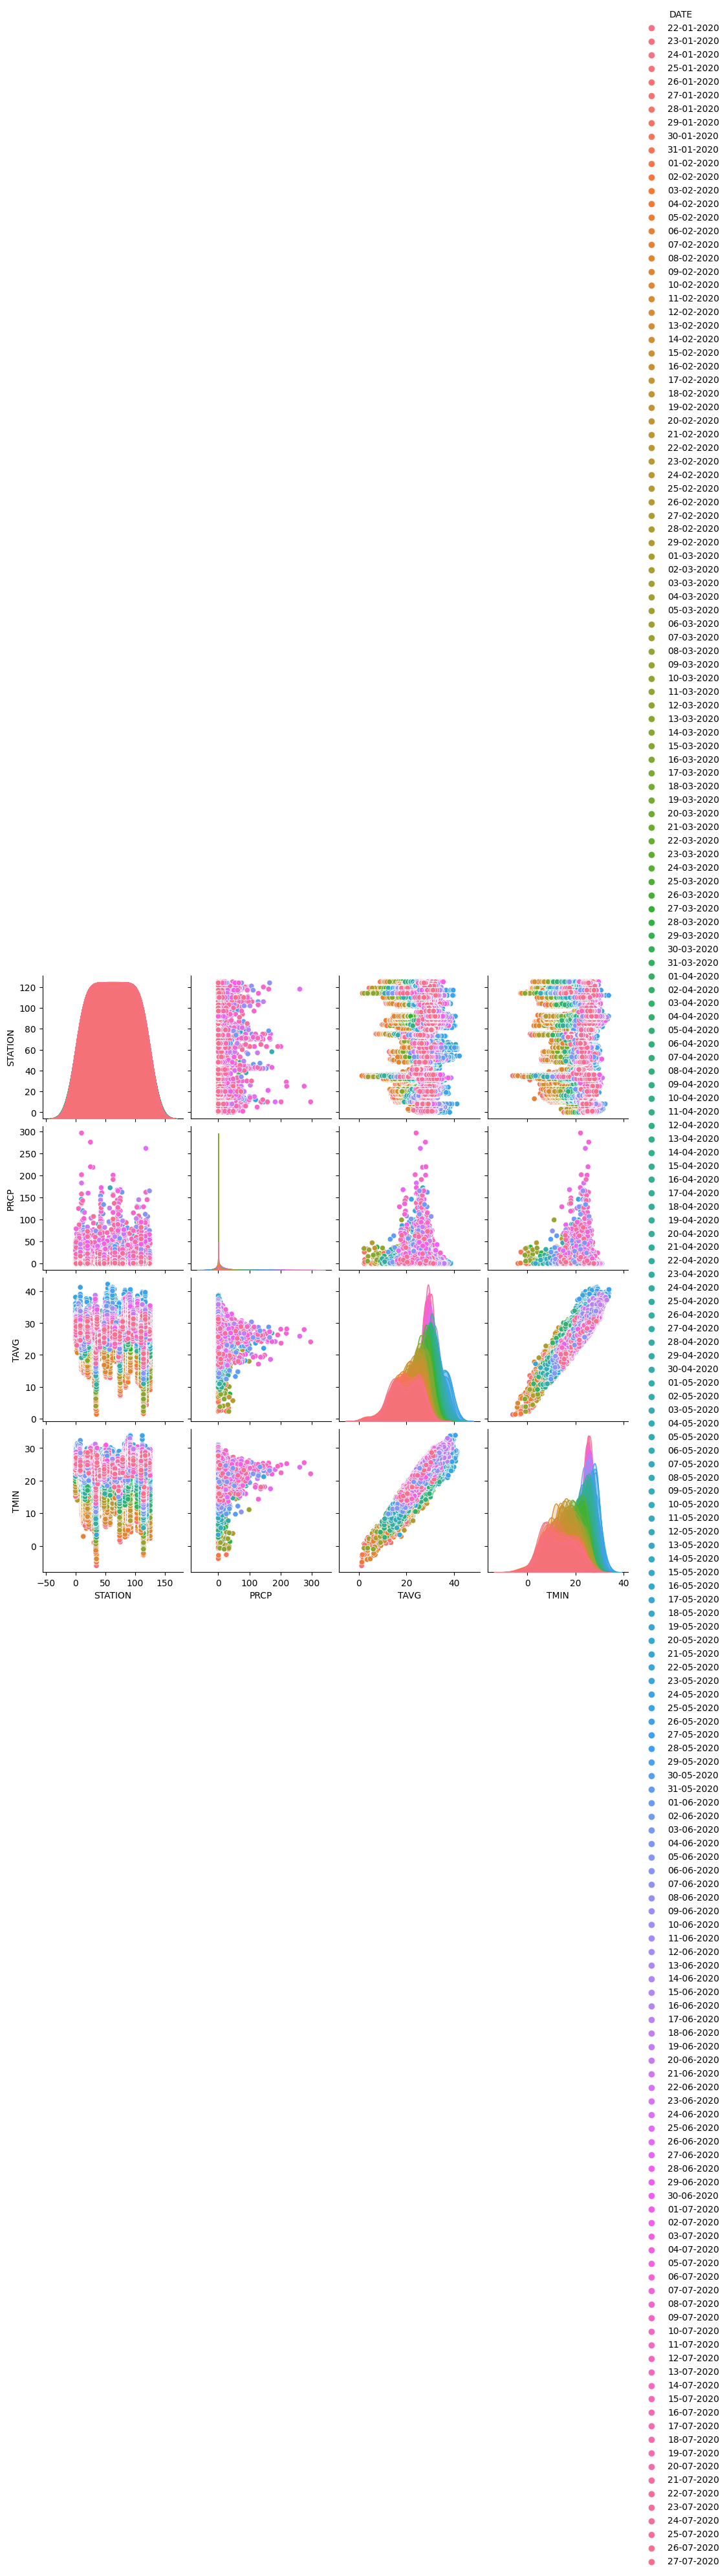

In [28]:
sns.pairplot(weather_india_final,hue='DATE')

### 18.  Date Index Setting

This code sets the 'DATE' column as the index for the `weather_india_final` DataFrame. It uses the 'DATE' column as the primary index for organizing and accessing the data.

In [29]:
weather_india_final.set_index('DATE',inplace = True)

In [30]:
weather_india_final

,STATION,PRCP,TAVG,TMIN
DATE,,,,
22-01-2020,80,NaN,22.5,16.1
23-01-2020,80,NaN,24.1,18.5
24-01-2020,80,NaN,23.2,NaN
25-01-2020,80,NaN,21.4,NaN
26-01-2020,80,NaN,21.3,NaN
...,...,...,...,...
23-07-2020,20,6.1,28.3,24.8
24-07-2020,20,0.0,25.7,NaN
25-07-2020,20,72.9,28.9,NaN


#### 19. Precipitation Value Counts

This code calculates the count of each unique value in the 'PRCP' column of the `weather_india_final` DataFrame. It then filters and stores values that occur more than 100 times in the `result1` variable. The code repeats the same operation twice.

In [31]:
count_1 = weather_india_final['PRCP'].value_counts()
result1 = count_1[count_1>100]
result1

PRCP
0.0     2687
2.0      386
1.0      376
0.5      370
3.0      310
0.3      275
4.1      253
5.1      197
6.1      195
7.1      169
8.9      152
0.8      143
7.9      129
10.9     115
9.9      110
Name: count, dtype: int64

#### 20. Precipitation Data Handling

This code fills missing values in the 'PRCP' column of the `weather_india_final` DataFrame. It first uses forward-fill (`method='ffill'`) to fill missing values, and then, if any remain, it fills them with 0. This ensures completeness of precipitation data. A further rechecking is done for exceptions.

In [32]:
weather_india_final['PRCP'].fillna(method = 'ffill',inplace=True)
weather_india_final['PRCP'].fillna(0,inplace=True)

In [33]:
weather_india_final['PRCP'].isnull().sum()

0

In [34]:
weather_india_final['PRCP'].value_counts()

PRCP
0.0      16506
2.0        544
1.0        437
0.5        395
3.0        389
         ...  
101.6        1
201.9        1
45.7         1
59.2         1
115.1        1
Name: count, Length: 270, dtype: int64

#### 21. Minimum Temperature Plot

This code creates a time series plot of the 'TMIN' (minimum temperature) data from the `weather_india_final` DataFrame. It visualizes the variation in minimum temperatures over time, with a specified figure size.

<Axes: xlabel='DATE'>

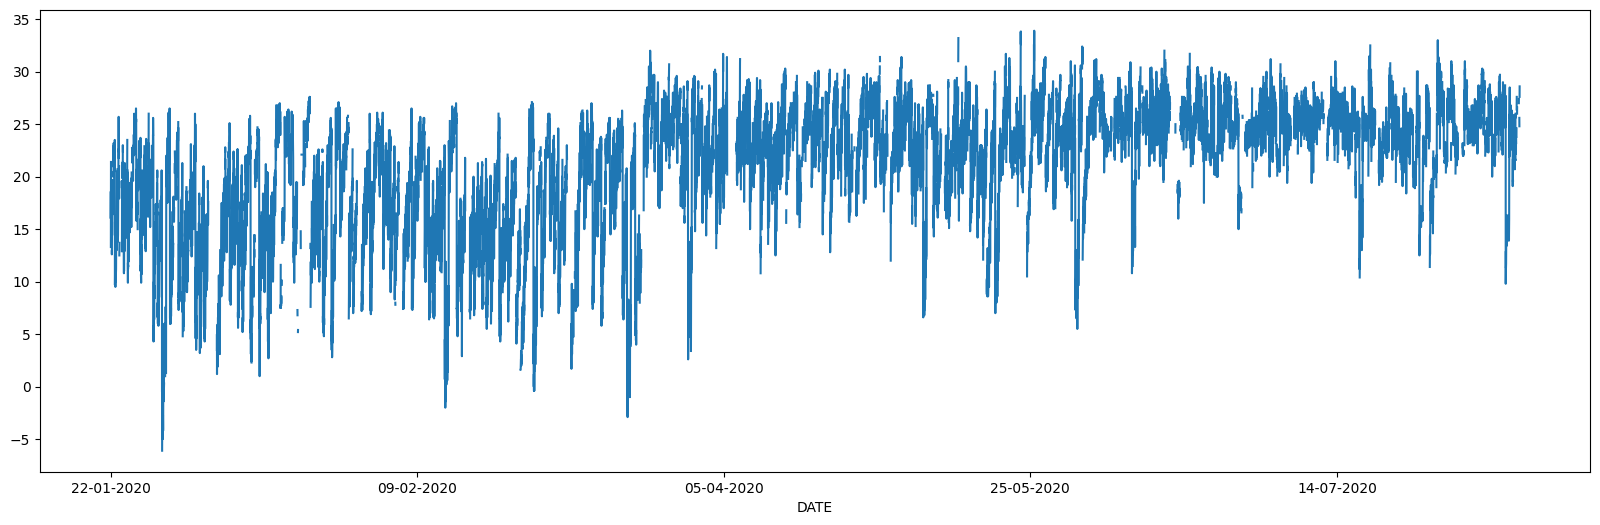

In [35]:
weather_india_final['TMIN'].plot(figsize=(20, 6))

#### 22. Summary Statistics for Minimum Temperature

This code calculates basic summary statistics for the 'TMIN' (minimum temperature) data in the `weather_india_final` DataFrame. It includes the mean, median, and mode of the minimum temperature values.

In [36]:
weather_india_final['TMIN'].mean()

20.949076712039677

In [37]:
weather_india_final['TMIN'].median()

22.5

In [38]:
weather_india_final['TMIN'].mode()

0    25.0
Name: TMIN, dtype: float64

#### 23. Month-Wise TAVGs for India

Here, we plotted the monthwise TAVGs for India, i.e., the plot for for avg temperature throughout India on every date, monthwise.

In [39]:
wi = pd.DataFrame(columns=['Date', 'TAVG'])

In [40]:
wi['Date'] = weather_india_final.groupby(['DATE'])['TAVG'].mean().index
wi['TAVG'] = weather_india_final.groupby(['DATE'])['TAVG'].mean().values
wi

,Date,TAVG
0,01-02-2020,19.222222
1,01-03-2020,24.184800
2,01-04-2020,28.278226
3,01-05-2020,30.018644
4,01-06-2020,28.780645
...,...,...
183,30-05-2020,29.461157
184,30-06-2020,29.409677
185,31-01-2020,19.145238
186,31-03-2020,27.643902


In [41]:
wi.set_index('Date',inplace=True)
wi.index = pd.to_datetime(wi.index, format="%d-%m-%Y")

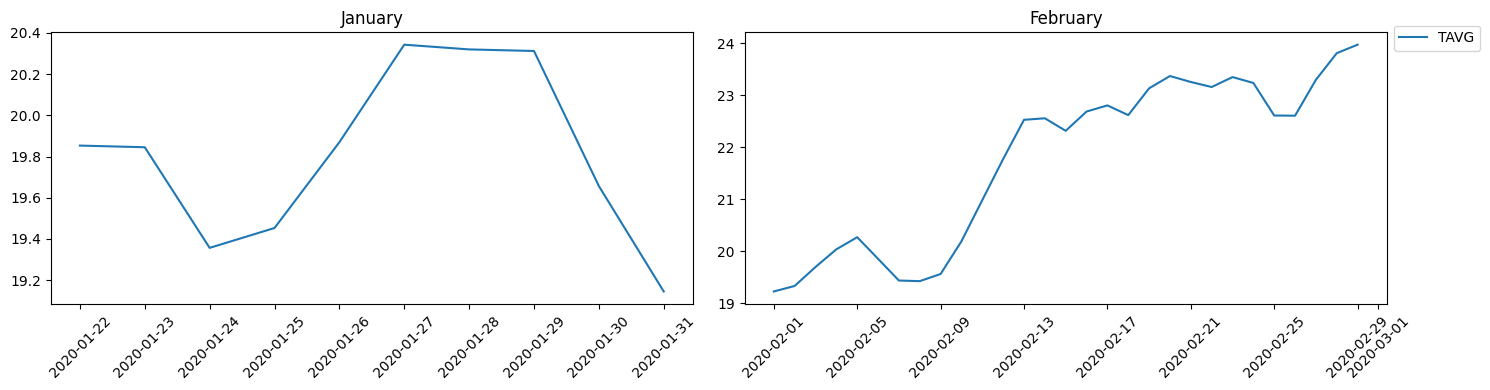

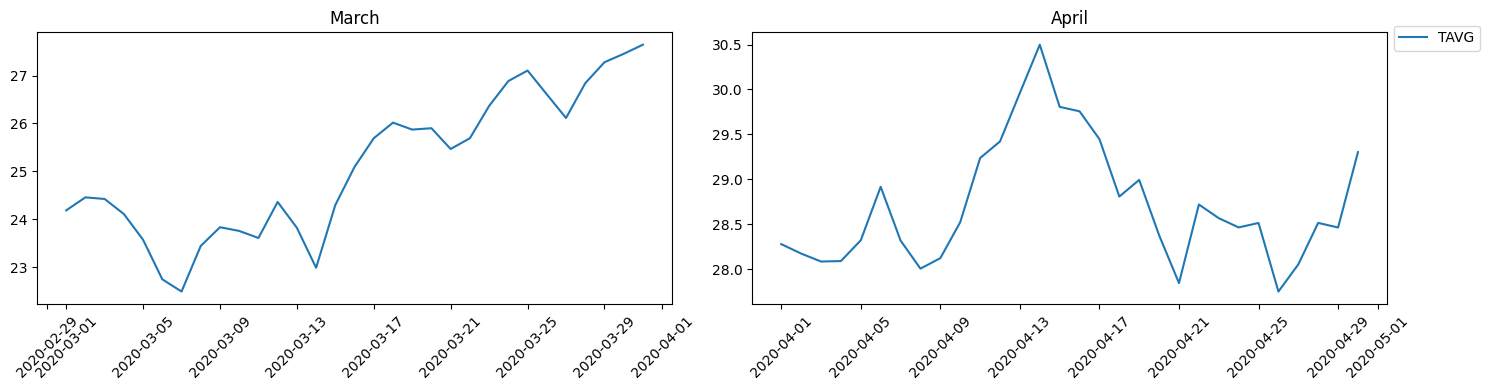

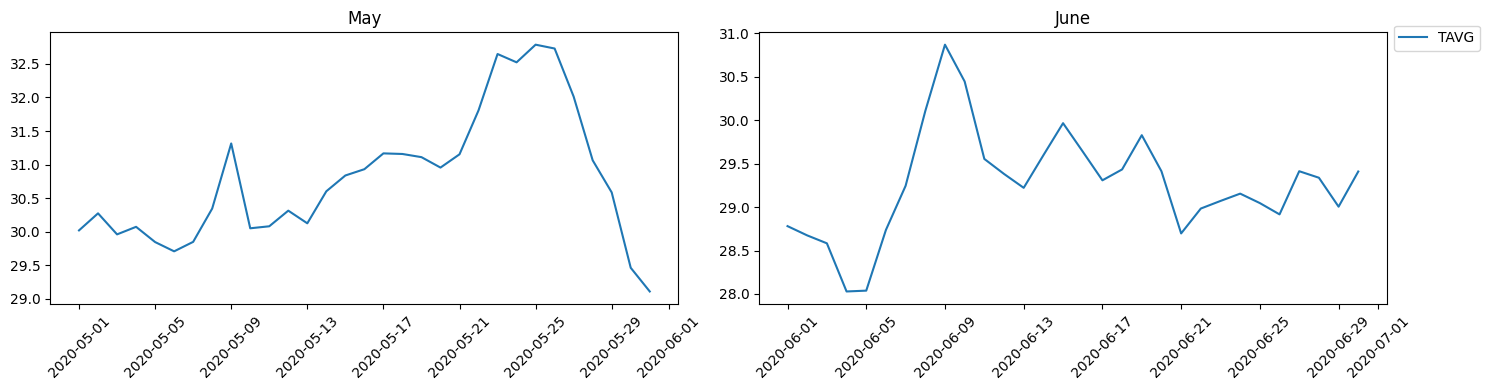

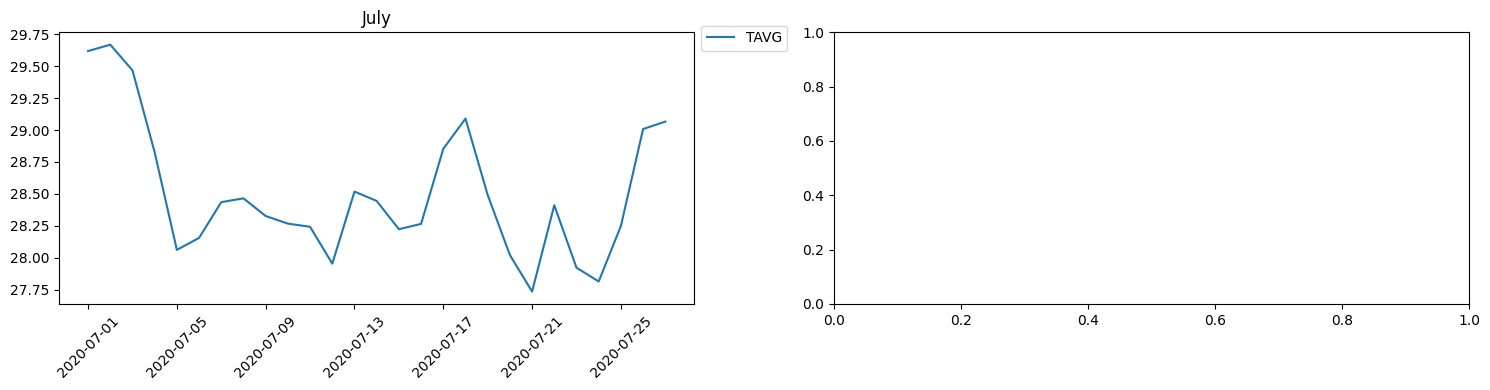

In [42]:
# Create subplots for each month
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
count = 0

for i in range(1, 8):  # Month numbers from 1 to 7
    temp = wi[wi.index.month == i]
    ax = axes[count]
    ax.plot(temp.index, temp['TAVG'], label='TAVG')
    ax.set_title(calendar.month_name[i])
    ax.tick_params(axis='x', rotation=45)
    
    if i == 7:
        ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
    
    count += 1
    
    if count == 2 or i == 7:
        ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        if i != 7:
            fig, axes = plt.subplots(1, 2, figsize=(15, 4))
            count = 0

#### 24. Handling Missing Minimum Temperature Data

If the mean is approximately 20.9490, the median is 22.5, and the mode is 25, this code fills missing values in the 'TMIN' (minimum temperature) column of the `weather_india_final` DataFrame. It replaces missing values with the median temperature to address data gaps.

In [43]:
weather_india_final['TMIN'].fillna(weather_india_final['TMIN'].median(),inplace=True)

In [44]:
weather_india_final

,STATION,PRCP,TAVG,TMIN
DATE,,,,
22-01-2020,80,0.0,22.5,16.1
23-01-2020,80,0.0,24.1,18.5
24-01-2020,80,0.0,23.2,22.5
25-01-2020,80,0.0,21.4,22.5
26-01-2020,80,0.0,21.3,22.5
...,...,...,...,...
23-07-2020,20,6.1,28.3,24.8
24-07-2020,20,0.0,25.7,22.5
25-07-2020,20,72.9,28.9,22.5


#### 25. Plotting Violinplots and Boxplots to analyze how data is distributed of features 'PRCP', 'TMIN', 'TMAX'.

<Axes: xlabel='PRCP'>

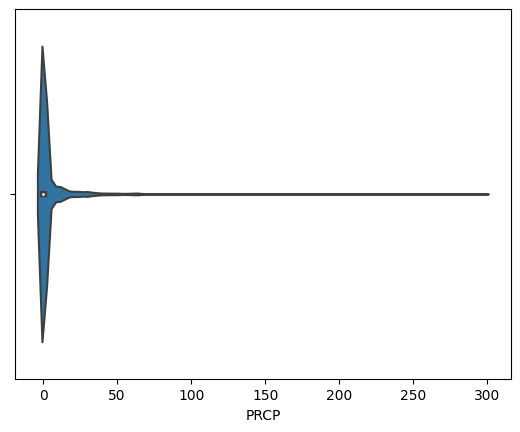

In [45]:
sns.violinplot(x=weather_india_final['PRCP'])

<Axes: xlabel='TAVG'>

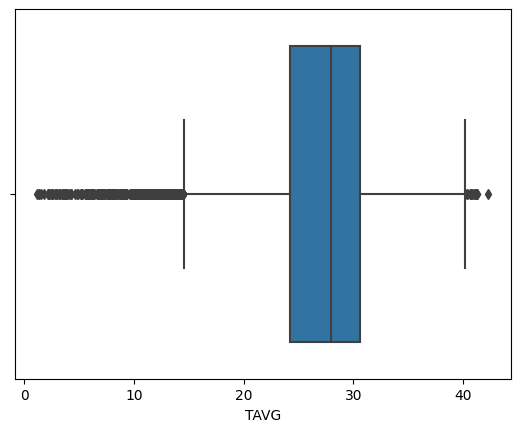

In [46]:
sns.boxplot(x=weather_india_final['TAVG'])

<Axes: xlabel='TAVG'>

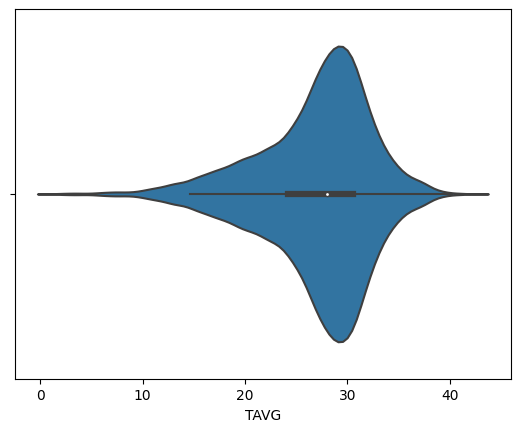

In [47]:
sns.violinplot(x=weather_india_final['TAVG'])

<Axes: xlabel='TMIN'>

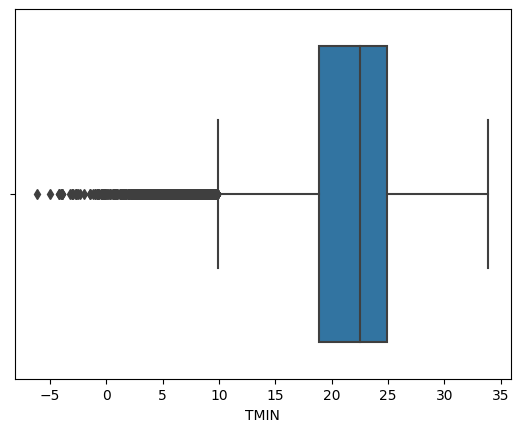

In [48]:
sns.boxplot(x=weather_india_final['TMIN'])

<Axes: xlabel='TMIN'>

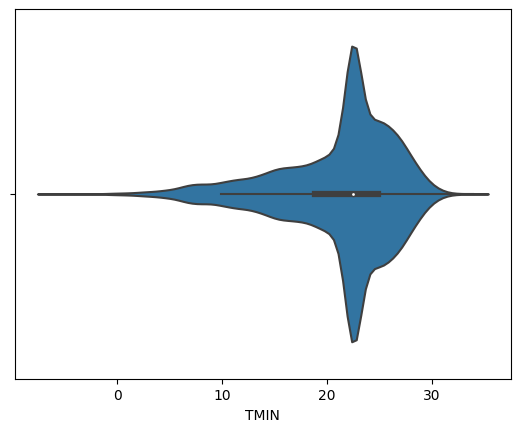

In [49]:
sns.violinplot(x=weather_india_final['TMIN'])

#### 26. Date Index Conversion

This code converts the index of the `weather_india_final` DataFrame to a datetime format using `pd.to_datetime()`. It enables time-based analysis and operations on the dataset.

In [50]:
weather_india_final.index = pd.to_datetime(weather_india_final.index)

#### 27. Temperature Trends

This code generates a line plot to visualize trends in both average temperature ('TAVG') and minimum temperature ('TMIN') from the `weather_india_final` DataFrame. It provides insights into temperature variations over time.

<Axes: xlabel='DATE'>

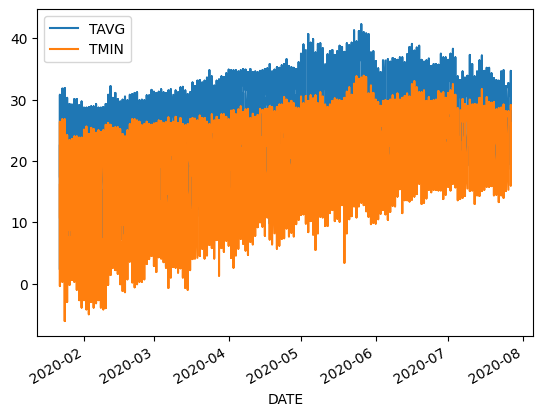

In [51]:
weather_india_final[['TAVG','TMIN']].plot()

#### 28. Creating Target Column

This code creates a new column named 'Target' in the `weather_india_final` DataFrame by shifting the 'TAVG' (average temperature) data one step forward. It is commonly used for time-series forecasting tasks.

In [52]:
weather_india_final['Target'] = weather_india_final.shift(-1)['TAVG']

In [53]:
weather_india_final = weather_india_final.iloc[:-1,:].copy()

In [54]:
weather_india_final

,STATION,PRCP,TAVG,TMIN,Target
DATE,,,,,
2020-01-22,80,0.0,22.5,16.1,24.1
2020-01-23,80,0.0,24.1,18.5,23.2
2020-01-24,80,0.0,23.2,22.5,21.4
2020-01-25,80,0.0,21.4,22.5,21.3
2020-01-26,80,0.0,21.3,22.5,21.2
...,...,...,...,...,...
2020-07-22,20,1.0,30.3,25.6,28.3
2020-07-23,20,6.1,28.3,24.8,25.7
2020-07-24,20,0.0,25.7,22.5,28.9


#### 29. Correlation Heatmap

This code generates a heatmap using Seaborn (`sns`) to visualize the correlation matrix of variables in the `weather_india_final` DataFrame. It helps identify relationships between variables.

<Axes: >

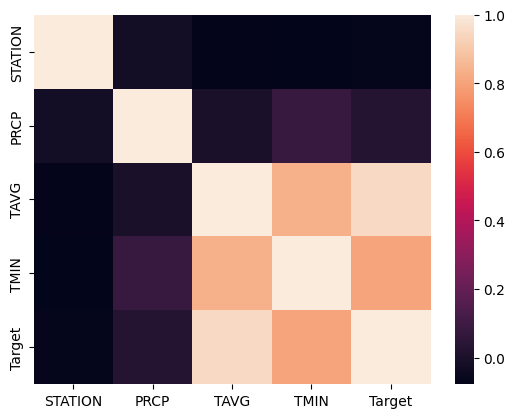

In [55]:
sns.heatmap(weather_india_final.corr())

#### 30. Data for Particular Station

This code filters the `weather_india_final` DataFrame to extract data specifically for Station 85. It allows for focused analysis on a particular weather station.


In [56]:
weather_india_final[weather_india_final['STATION'] == 85]

,STATION,PRCP,TAVG,TMIN,Target
DATE,,,,,
2020-01-22,85,0.0,15.5,10.8,14.3
2020-01-23,85,0.0,14.3,9.5,15.1
2020-01-24,85,0.0,15.1,7.4,15.9
2020-01-25,85,0.0,15.9,7.6,18.5
2020-01-26,85,0.0,18.5,8.7,19.6
...,...,...,...,...,...
2020-07-23,85,0.5,31.7,27.2,24.7
2020-07-24,85,0.5,24.7,22.5,28.2
2020-07-25,85,93.0,28.2,21.4,29.4


#### 31. Unique Stations

This code extracts and displays the unique weather station identifiers ('STATION') from the `weather_india_final` DataFrame. It provides a list of distinct station IDs.

In [57]:
stations = weather_india_final['STATION'].unique()
stations

array([ 80,  86,  23,  26,  10,  44,   2,  29,  30,  70, 108,  51,  35,
        42, 105,   9, 120, 104,  11,  24,  84,  87,  93,  61,  54,  75,
        82,  77,  90,  64, 118,  27,  94, 125,  96,  31,  39,  83,  81,
        99, 113,  46, 101,  72,  18,  43,  45,  57,  59,  28, 109,   5,
        33, 107,  40,   4,  56,  15,  67,  21,  63,  19,  95, 106,  60,
         3,  12, 102,  55, 103, 122,  85,  78,  98,  52,  58, 111,  65,
        76,  34,  71,  47,  88,  13, 123,  49,  14,  62,  89, 116,  50,
        73,  32,  53,  16,  38,  36, 119,  69, 100, 115,  37,  91,   7,
        41, 121, 112,  48,  68,  74,  92, 124,   0,   6,  17,  25,  22,
         1,  66,  79,  97, 117, 114,   8, 110,  20])

#### 32. Correlation Heatmap with Annotations

This code generates a heatmap using Seaborn (`sns`) to visualize the correlation matrix of variables in the `weather_india_final` DataFrame. It includes annotations and uses the 'coolwarm' color map to highlight correlations between variables.

<Axes: >

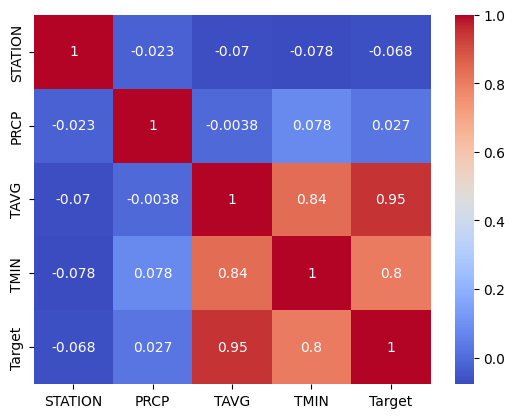

In [58]:
sns.heatmap(weather_india_final.corr(),annot=True, cmap='coolwarm')

## **3. Regression Models**

For predictions, we have the first 6 months of data in our training set and the last month, which is the seventh month, in our test data. Our model's task is to provide the average temperature for the next day for all the stations present in India during this seventh month.

### 1. Linear Regression
Using Linear regression on weather station data, measuring performance metrics, and plotting predictions to evaluate model fit.

In [59]:
Linear_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

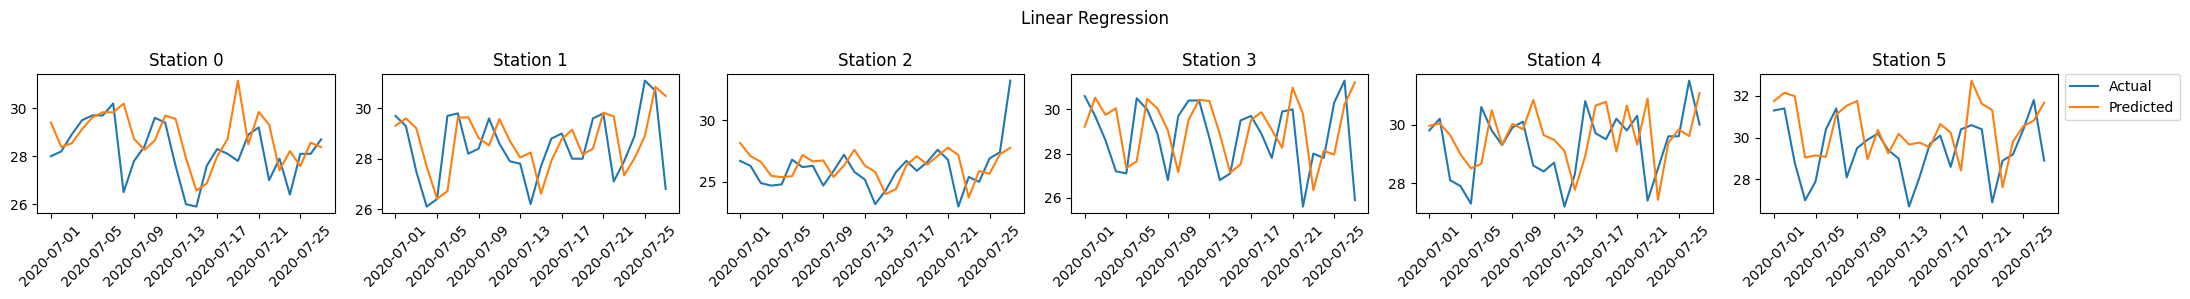

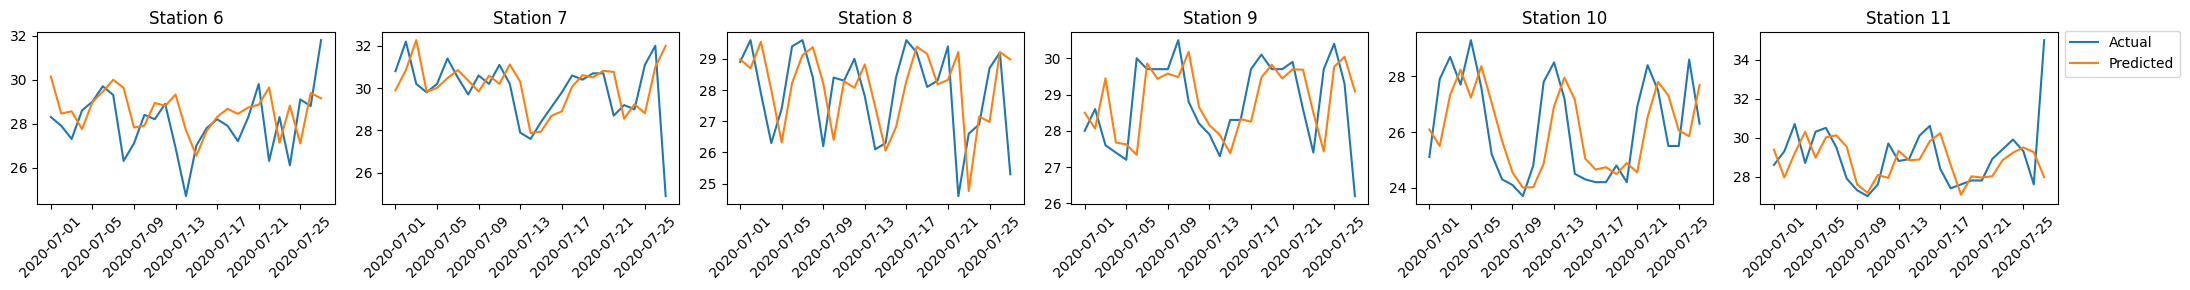

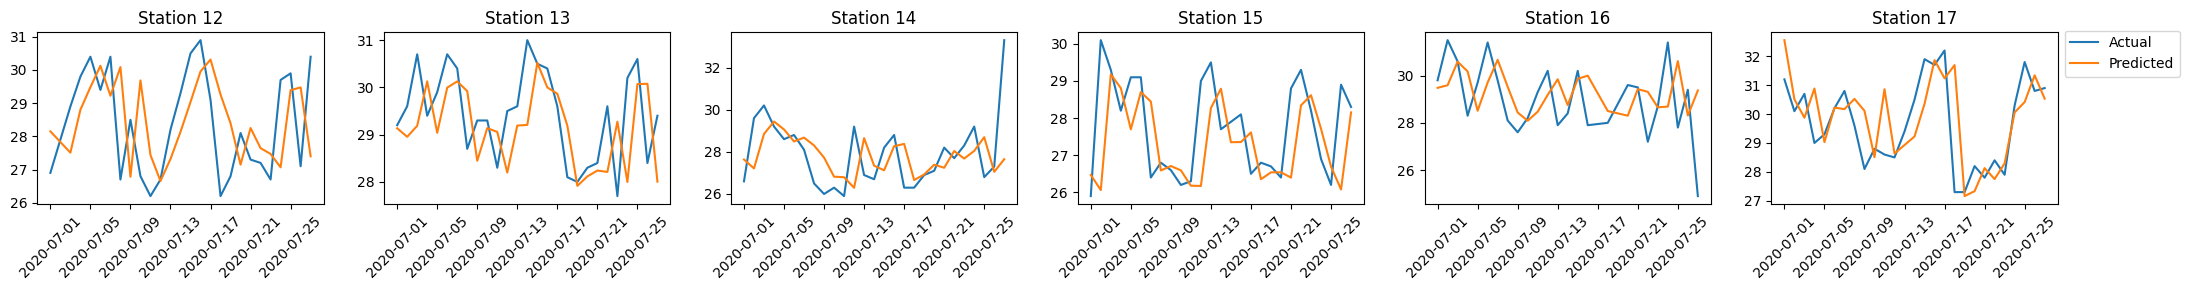

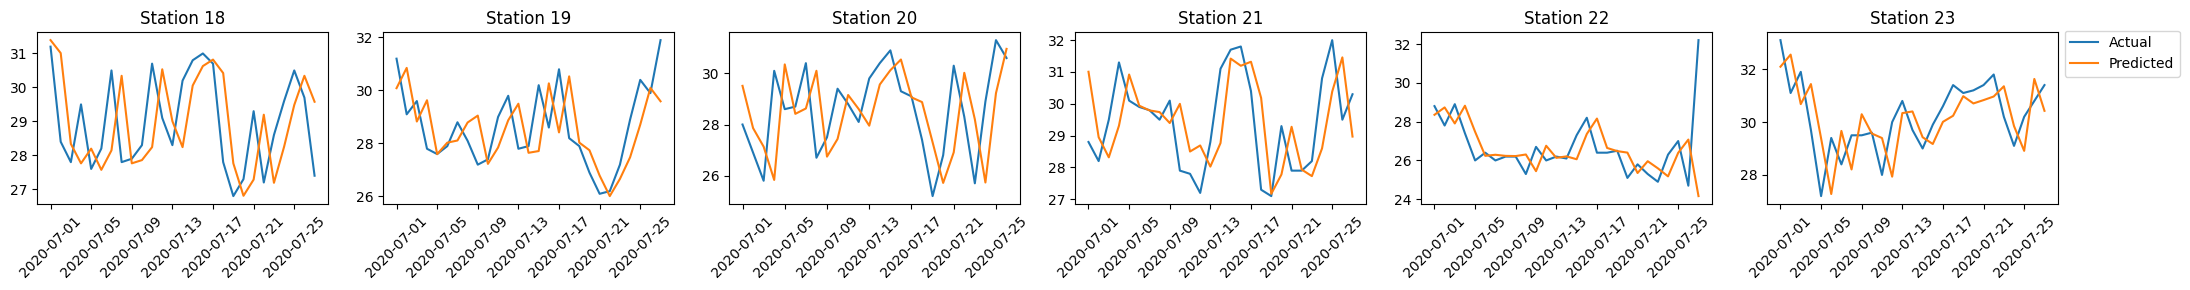

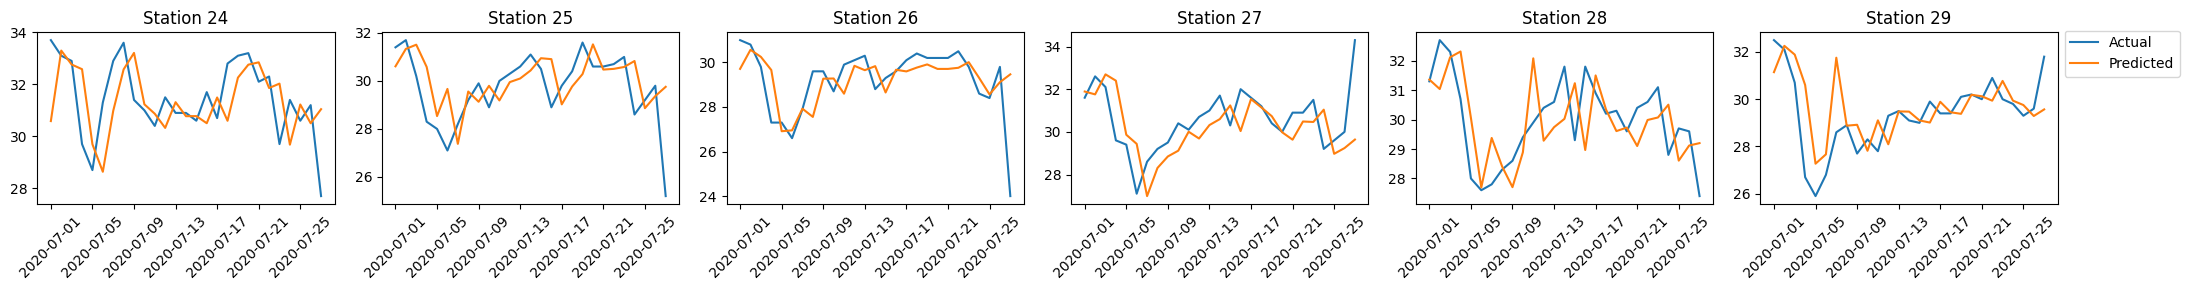

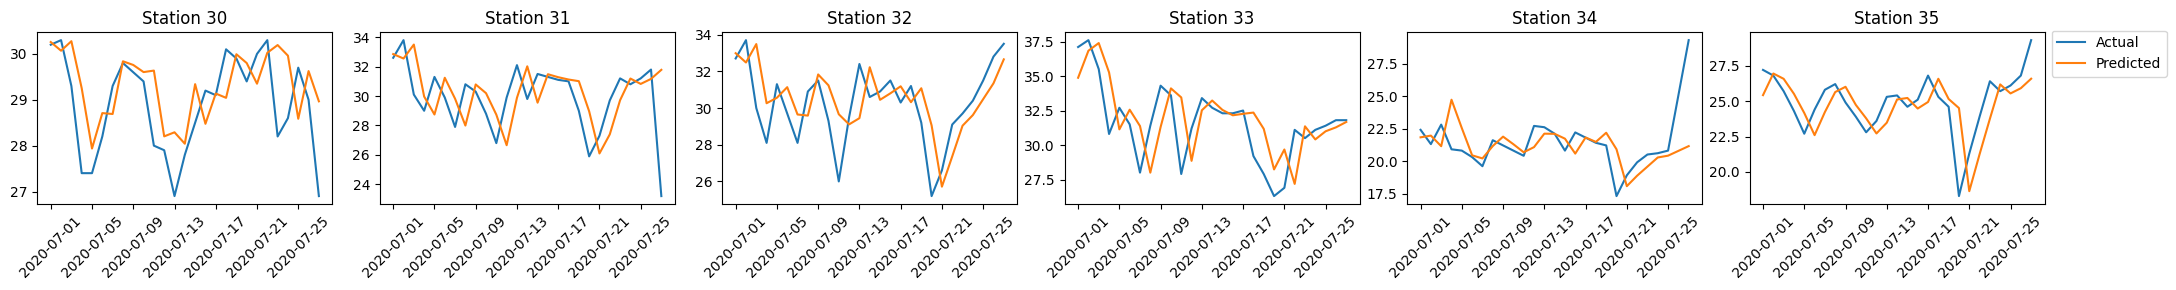

In [60]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('Linear Regression')
for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy() 
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    Linear = LinearRegression()
    Linear.fit(X_train_scaled, y_train)
    
    preds = Linear.predict(X_test_scaled)

    metrics = {'Station': i, 'MAE': mean_absolute_error(y_test, preds), 'MSE': mean_squared_error(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)), 'Accuracy': str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100), 2)) + '%'}

    Linear_metrics = pd.concat([Linear_metrics, pd.DataFrame([metrics])], ignore_index=True)
    
    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    
    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f"Station {i}")
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

Linear_metrics

### 2. Polynomial Regression
Employing Polynomial regression on weather data, calculating evaluation metrics, and visualizing predictions to assess model flexibility.

In [ ]:
Poly_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

In [ ]:
params = {
    'polynomialfeatures__degree': [2, 3, 4],  # Adjust the degrees as needed
    'linearregression__fit_intercept': [True, False],
}

In [ ]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('Polynomial Regression')
for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy() 
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    polyreg = make_pipeline(PolynomialFeatures(), LinearRegression())
    
    grid_search = GridSearchCV(estimator=polyreg, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    preds = grid_search.predict(X_test_scaled)

    metrics = {'Station': i, 'MAE': mean_absolute_error(y_test, preds), 'MSE': mean_squared_error(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)), 'Accuracy': str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100), 2)) + '%'}

    Poly_metrics = pd.concat([Poly_metrics, pd.DataFrame([metrics])], ignore_index=True)
    
    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    print(f"Best Params for Station {i} : {grid_search.best_params_}")

    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}')
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [ ]:
Poly_metrics

### 3. SGD Regression
Utilizing SGD regression on weather station data, computing model metrics, and plotting predictions to evaluate model efficiency and convergence.

In [ ]:
sgd_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

In [ ]:
params = {
    'alpha': [0.0006, 0.0009, 0.0003, 0.001, 0.0015, 0.002, 0.1, 0.3, 0.6, 0.005, 0.003, 0.09, 0.06, 0.006, 1, 5, 8, 10, 20],
    'solver': ['auto', 'svd', 'cholesky', 'saga', 'lsqr', 'sparse_cg', 'sag']
}

In [ ]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('SGD Regression')

for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy()
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    
    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    sgd_regressor = SGDRegressor()
    sgd_regressor.fit(X_train_scaled, y_train)
    
    preds = sgd_regressor.predict(X_test_scaled)
    
    metrics = {'Station': i, 'MAE': mean_absolute_error(y_test, preds), 'MSE': mean_squared_error(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)), 'Accuracy': str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100), 2)) + '%'}
    
    sgd_metrics = pd.concat([sgd_metrics, pd.DataFrame([metrics])], ignore_index=True)

    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    
    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}')
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [ ]:
sgd_metrics

### 4. Lasso Regression
Conducting Lasso regression on weather station data, calculating performance metrics, and visualizing predictions to evaluate model accuracy.

In [ ]:
lasso_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

In [ ]:
params_lasso = {
'alpha': [0.0006, 0.0009, 0.0003, 0.001, 0.0015, 0.002, 0.1, 0.3, 0.6, 0.005, 0.003, 0.09, 0.06, 0.006, 1, 5, 8, 10, 20],
'selection': ['cyclic', 'random'],
'max_iter': [100, 500, 1000],
'fit_intercept': [True, False]
}

In [ ]:


stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('Lasso Regression') # Updated title

for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy()
    df.drop(['STATION'], axis=1, inplace=True)

    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']

    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)

    lasso = GridSearchCV(estimator=Lasso(), param_grid=params_lasso, scoring='neg_mean_squared_error', cv=5)
    lasso.fit(X_train_scaled, y_train)

    preds = lasso.predict(X_test_scaled)

    metrics = {'Station': i, 'MAE': mean_absolute_error(y_test, preds), 'MSE': mean_squared_error(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)), 'Accuracy': str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100), 2)) + '%'}

    lasso_metrics = pd.concat([lasso_metrics, pd.DataFrame([metrics])], ignore_index=True)

    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']

    print(f'Best Params for Station {i} : {lasso.best_params_}')

    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}')
    ax[count].tick_params(axis='x', rotation=45)

    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()

        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [ ]:
lasso_metrics

### 5. Ridge Regression
Applying Ridge regression to weather station data, computing metrics, and visualizing predictions to assess model accuracy and regularization.

In [ ]:
Ridge_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

In [ ]:
params = {'alpha': [0.0006,0.0009,0.0003,0.001,0.0015,0.002,0.1,0.3,0.6,0.005,0.003,0.09,0.06,0.006,1,5,8,10,20],
          'solver' : ['auto', 'svd', 'cholesky', 'saga','lsqr', 'sparse_cg', 'sag']
         }

In [ ]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('Ridge Regression')
for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy() 
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    grid_search = GridSearchCV(estimator=Ridge(), param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    preds = grid_search.predict(X_test_scaled)

    metrics = {'Station': i, 'MAE': mean_absolute_error(y_test, preds), 'MSE': mean_squared_error(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)), 'Accuracy': str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100), 2)) + '%'}

    Ridge_metrics = pd.concat([Ridge_metrics, pd.DataFrame([metrics])], ignore_index=True)
    
    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    print(f'Best Params for Station {i} : {grid_search.best_params_}')

    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}\n')
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [ ]:
Ridge_metrics

### 6. ElasticNet Regression
Utilizing Elastic Net regression on weather station data, calculating metrics, and visualizing predictions to assess model accuracy and hybrid regularization.

In [ ]:
ElasticNet_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

In [ ]:
params = {'alpha': [0.001,0.003,0.01,0.03,0.1,0.3,1,3,10],
          'l1_ratio': np.arange(0.30,1.00,0.10),
           'tol' : [0.0001,0.001]
         }

In [ ]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('ElasticNet Regression')
for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy() 
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    grid_search = GridSearchCV(estimator=ElasticNet(), param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    preds = grid_search.predict(X_test_scaled)

    metrics = {'Station': i, 'MAE': mean_absolute_error(y_test, preds), 'MSE': mean_squared_error(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)), 'Accuracy': str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100), 2)) + '%'}

    ElasticNet_metrics = pd.concat([ElasticNet_metrics, pd.DataFrame([metrics])], ignore_index=True)
    
    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']

    print(f'Best Params for Station {i} : {grid_search.best_params_}')
    
    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}')
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [ ]:
ElasticNet_metrics

### 7. SVR(Support Vector Regressor)
Implementing SVR regression on weather data, calculating performance metrics, and visualizing predictions to evaluate model accuracy in a support vector machine context.

In [ ]:
svr_metrics = pd.DataFrame(columns=['Station', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

In [ ]:
params_svr = { 
                'kernel': ['linear', 'rbf','poly'], 
                'C':[1.5, 10],
                'gamma': [1e-7, 1e-4],
                'epsilon':[0.1,0.2,0.5,0.3]
             }

In [ ]:
stations = sorted(weather_india_final['STATION'].unique())
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
fig.suptitle('Ridge Regression')
for i, station in enumerate(stations):
    df = weather_india_final[weather_india_final['STATION'] == station].copy() 
    df.drop(['STATION'], axis=1, inplace=True)
    
    train = df.loc[:'2020-06-30']
    X_train = train.drop('Target', axis=1)
    y_train = train['Target']
    

    test = df.loc['2020-07-01':]
    X_test = test.drop(['Target'], axis=1)
    y_test = test['Target']
    
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    
    svr = GridSearchCV(estimator=SVR(), param_grid=params_svr, scoring='neg_mean_squared_error', cv=2)
    svr.fit(X_train_scaled, y_train)
    
    preds = svr.predict(X_test_scaled)

    metrics = {'Station': i, 'MAE': mean_absolute_error(y_test, preds), 'MSE': mean_squared_error(y_test, preds),
    'RMSE': np.sqrt(mean_squared_error(y_test, preds)), 'Accuracy': str(round(100 - (np.mean(np.abs(y_test - preds) / y_test) * 100), 2)) + '%'}

    svr_metrics = pd.concat([svr_metrics, pd.DataFrame([metrics])], ignore_index=True)
    
    combined = pd.concat([y_test, pd.Series(preds, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    
    print(f'Best Params for Station {i} : {grid_search.best_params_}')
    count = i % 6
    ax[count].plot(combined.index, combined['Actual'], label='Actual')
    ax[count].plot(combined.index, combined['Predictions'], label='Predicted')
    ax[count].set_title(f'Station {station}\n')
    ax[count].tick_params(axis='x', rotation=45)
    
    if (count == 5) or (i == (len(stations) - 1)):
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.05))
        plt.tight_layout()
        plt.show()
        
        if i != (len(stations) - 1):
            fig, ax = plt.subplots(1, 6, figsize=(22, 3))

In [ ]:
svr_metrics

## **4. Model Comparison for Weather Data**

In this analysis, we compare multiple machine learning models for predicting weather data at various weather stations. We assess the model performance using three key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The following machine learning models are included in the comparison:

- Linear Regression
- Polynomial Regression
- Stochastic Gradient Descent (SGD)
- Lasso Regression
- Ridge Regression
- Elastic Net
- Support Vector Regression (SVR)

### Data Preparation

We start by loading the weather data and calculating the MAE, MSE, and RMSE for each model. This involves data preprocessing, feature selection, and model training. 

### Model Comparison Plots

Next, we create bar plots to visualize and compare the performance of each model across different weather stations. The plots display the MAE, MSE, and RMSE values for each model. Different colors represent each model for easy differentiation.

The code utilizes Matplotlib to generate the plots and includes annotations on top of each bar to display the corresponding metric values.

In [ ]:
Linear_plot = pd.DataFrame({    
    "MAE" : Linear_metrics['MAE'],
    "MSE" : Linear_metrics['MSE'],
    "RMSE" : Linear_metrics['RMSE']
})

Poly_plot = pd.DataFrame({    
    "MAE" : Poly_metrics['MAE'],
    "MSE" : Poly_metrics['MSE'],
    "RMSE" : Poly_metrics['RMSE']
})

SGD_plot = pd.DataFrame({    
    "MAE" : sgd_metrics['MAE'],
    "MSE" : sgd_metrics['MSE'],
    "RMSE" : sgd_metrics['RMSE']
})

Lasso_plot = pd.DataFrame({
    "MAE": lasso_metrics['MAE'],  
    "MSE": lasso_metrics['MSE'], 
    "RMSE": lasso_metrics['RMSE']
})

Ridge_plot = pd.DataFrame({
    "MAE": Ridge_metrics['MAE'], 
    "MSE": Ridge_metrics['MSE'], 
    "RMSE": Ridge_metrics['RMSE']
})

ElasticNet_plot = pd.DataFrame({
    "MAE": ElasticNet_metrics['MAE'], 
    "MSE": ElasticNet_metrics['MSE'], 
    "RMSE": ElasticNet_metrics['RMSE']
})

Svr_plot = pd.DataFrame({
    "MAE": svr_metrics['MAE'],  
    "MSE": svr_metrics['MSE'],  
    "RMSE": svr_metrics['RMSE']
})

stations = sorted(weather_india_final['STATION'].unique())


num_rows = len(stations)  
num_cols = 3   

fig_width = 16
fig_height = 4 * num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
plt.subplots_adjust(top=0.9)

fig.suptitle('Model Comparison',y=1.0)  
for i, station in enumerate(stations):
    
    mae_A = Linear_plot["MAE"].iloc[i]
    mse_A = Linear_plot["MSE"].iloc[i]
    rmse_A = Linear_plot["RMSE"].iloc[i]
    mae_B = Poly_plot["MAE"].iloc[i]
    mse_B = Poly_plot["MSE"].iloc[i]
    rmse_B = Poly_plot["RMSE"].iloc[i]
    mae_C = SGD_plot["MAE"].iloc[i]
    mse_C = SGD_plot["MSE"].iloc[i]
    rmse_C = SGD_plot["RMSE"].iloc[i]
    mae_D = Lasso_plot["MAE"].iloc[i]
    mse_D = Lasso_plot["MSE"].iloc[i]
    rmse_D = Lasso_plot["RMSE"].iloc[i]
    mae_E = Ridge_plot["MAE"].iloc[i]
    mse_E = Ridge_plot["MSE"].iloc[i]
    rmse_E = Ridge_plot["RMSE"].iloc[i]  
    mae_F = ElasticNet_plot["MAE"].iloc[i]
    mse_F = ElasticNet_plot["MSE"].iloc[i]
    rmse_F = ElasticNet_plot["RMSE"].iloc[i]
    mae_G = Svr_plot["MAE"].iloc[i]
    mse_G = Svr_plot["MSE"].iloc[i]
    rmse_G = Svr_plot["RMSE"].iloc[i]
    
    
    row = i  
    col_mae = 0  
    col_mse = 1  
    col_rmse = 2
    
    models = ['Linear', 'Polynomial', 'SGD', 'Lasso', 'Ridge', 'Elastic Net', 'SVR']
    mae_values = [mae_A, mae_B, mae_C, mae_D, mae_E, mae_F, mae_G]
    bar_positions = range(len(models))
    axes[row, col_mae].bar(models, mae_values, color=['b', 'r', 'g', 'c', 'm', 'y', 'k'], alpha=0.7)
    axes[row, col_mae].set_title(f'Station {station} - MAE')
    
    max_mae = max(mae_values)
    for x, y in zip(bar_positions, mae_values):
        axes[row, col_mae].text(x, max_mae / 2, f'{y:.2f}', ha='center', va='center')
    
    mse_values = [mse_A, mse_B, mse_C, mse_D, mse_E, mse_F, mse_G]
    axes[row, col_mse].bar(models, mse_values, color=['b', 'r', 'g', 'c', 'm', 'y', 'k'], alpha=0.7)
    axes[row, col_mse].set_title(f'Station {station} - MSE')
    
    max_mse = max(mse_values)
    for x, y in zip(bar_positions, mse_values):
        axes[row, col_mse].text(x, max_mse / 2, f'{y:.2f}', ha='center', va='center')
        
    rmse_values = [rmse_A, rmse_B, rmse_C, rmse_D, rmse_E, rmse_F, rmse_G]
    axes[row, col_rmse].bar(models, rmse_values, color=['b', 'r', 'g', 'c', 'm', 'y', 'k'], alpha=0.7)
    axes[row, col_rmse].set_title(f'Station {station} - RMSE')
    
    max_rmse = max(rmse_values)
    for x, y in zip(bar_positions, rmse_values):
        axes[row, col_rmse].text(x, max_rmse / 2, f'{y:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()


## **5. National Contribution (Specific to India):**
- **Enhancing Agriculture**: Describe how accurate weather predictions can significantly benefit India's agriculture sector, which heavily relies on weather conditions. Improved forecasts can help farmers plan planting and harvesting times more effectively.

- **Disaster Preparedness**: Discuss how your project's contributions to weather prediction can enhance India's disaster preparedness and response mechanisms, reducing the impact of natural disasters such as floods, cyclones, and droughts.

- **Economic Impact**: Explain how better weather forecasts can have a positive economic impact in India. This may include reducing crop losses, optimizing energy generation, and improving transportation logistics.

- **Research and Innovation**: Emphasize how your work promotes research and innovation in India, potentially leading to the development of indigenous weather forecasting technologies and expertise.

- **Collaboration**: If applicable, mention any collaborations with Indian government agencies or institutions in the field of meteorology and how your project aligns with their objectives.

- **Capacity Building**: Discuss how your project may contribute to building the capacity of Indian meteorologists and researchers, ultimately leading to more accurate and reliable weather predictions for the country.